In [163]:
# Import numerical resources
import numpy as np
import random as rn

# Import graphics resources
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook

In [164]:
x = np.linspace(0,1.0,9); print x
dx = x[1]-x[0]; print dx

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]
0.125


In [165]:
D = 1.0

In [166]:
dt = dx**2/2/D /3; print dt
nt = 100 # Number of time steps
t = dt*nt; print t

0.00260416666667
0.260416666667


In [167]:
C = (dt * D) / (dx**2); print C # For constants in "propagate" function 

0.166666666667


In [168]:
# Starting f(t,x) as 2-D array of random numbers; pseudo: f[time][x]; n = 0 row stores initial field

f = np.array([[0.0 for i in range(len(x))] for j in range(nt+1)]) # Adding a time row to include intial field
for k in range(0,len(x)):
    f[0][k] = rn.random()
    
print f

[[ 0.44967033  0.36687153  0.86030291  0.27389254  0.3013342   0.83275545
   0.57138829  0.8301433   0.42245097]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.      

In [169]:
# Function that iterates diffusion values through number of time steps
def propagate(f, nt, dt):
    # nt = len(f) - 1 # not including initial field in number of time steps
    # print nt
    t_tot = [0.0]
    t = 0.0
    for n in range(0, nt) :
        t += dt
        t_tot.append(t)
        for k in range(0, len(x)):
            f_pre = f[n][k] 
            if k == 0:
                f[n+1][k] = C * ( f[n][len(x)-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hi'

            elif k == (len(x) - 1):
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][0] ) + f_pre
                # print'hello'
            else:
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hey'
                
    return f, t_tot

In [170]:
f, t_tot = propagate(f,nt,dt)
xgrid, tgrid = np.meshgrid(x,t_tot)

%whos

Variable    Type             Data/Info
--------------------------------------
Axes3D      type             <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
C           float64          0.166666666667
D           float            1.0
ax          Axes3DSubplot    Axes(0.125,0.1;0.775x0.8)
dt          float64          0.00260416666667
dx          float64          0.125
f           ndarray          101x9: 909 elems, type `float64`, 7272 bytes
fig         Figure           Figure(640x480)
i           int              8
j           int              100
k           int              8
l           int              7
np          module           <module 'numpy' from '//a<...>ages/numpy/__init__.pyc'>
nt          int              100
plt         module           <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
propagate   function         <function propagate at 0x11457db90>
rand        float            0.684970257898
rn          module           <module 'random' from '//<...>ib/python2.7/random

<IPython.core.display.Javascript object>


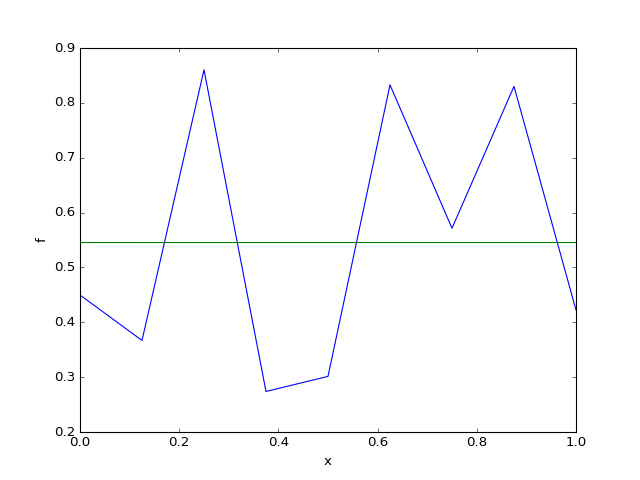

In [171]:
# This graphs first and last
plt.figure()
plt.plot(x,f[0])
plt.plot(x,f[-1])
plt.xlabel('x')
plt.ylabel('f')

<IPython.core.display.Javascript object>


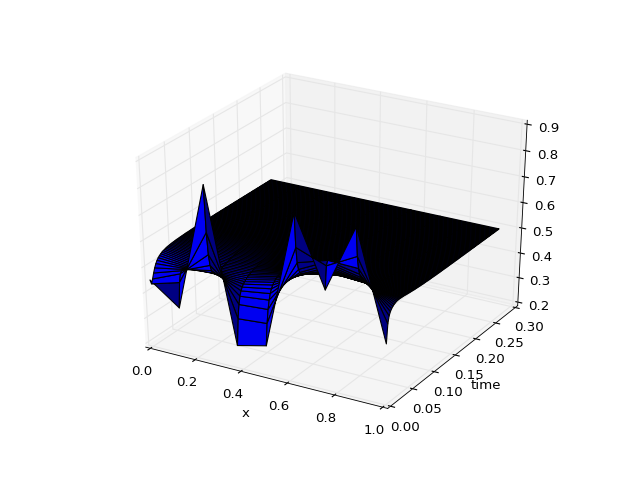

In [172]:
# This plots the solution as a function of time and space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, tgrid, f, rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('time')